# IS 362 – Week 10 Assignment
**Topic:** Using APIs (New York Times)
**Name:** Htet Eaindray Thet

This notebook demonstrates using the New York Times API to pull real-time data and perform a basic analysis.


In [7]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 6)


In [8]:
NYT_KEY = "DTImOBlAd8vZtQ8jipa2e7jnzo3YT6vR"


In [9]:
section = "world"
url = f"https://api.nytimes.com/svc/topstories/v2/{section}.json"
params = {"api-key": NYT_KEY}

response = requests.get(url, params=params)
print("Status code:", response.status_code)

data = response.json()
print(data.keys())


Status code: 200
dict_keys(['status', 'copyright', 'section', 'last_updated', 'num_results', 'results'])


In [10]:
articles = pd.json_normalize(data["results"])
articles.head()


,section,subsection,title,abstract,url,uri,byline,item_type,updated_date,created_date,published_date,material_type_facet,kicker,des_facet,org_facet,per_facet,geo_facet,multimedia,short_url
0,world,americas,Gay Russians Find a Haven on the Other Side of...,Argentina has emerged as a surprisingly promin...,https://www.nytimes.com/2025/11/09/world/ameri...,nyt://article/e8a6e152-846b-5867-9a0a-aa93ec71...,"By Emma Bubola, Daniel Politi and Sarah Pabst",Article,2025-11-09T14:14:37-05:00,2025-11-09T05:01:36-05:00,2025-11-09T05:01:36-05:00,,,"[Homosexuality and Bisexuality, Russian Invasi...",[],"[Putin, Vladimir V]","[Argentina, Russia, Buenos Aires (Argentina)]",[{'url': 'https://static01.nyt.com/images/2025...,
1,world,europe,BBC’s Director General and Chief Executive Qui...,The abrupt moves followed controversy over cla...,https://www.nytimes.com/2025/11/09/world/europ...,nyt://article/6e19099c-e5e2-5d18-b054-2bf23573...,By Stephen Castle,Article,2025-11-09T15:01:03-05:00,2025-11-09T14:15:50-05:00,2025-11-09T14:15:50-05:00,,,[internal-open-access-from-nl],[British Broadcasting Corp],"[Davie, Tim (1967- ), Trump, Donald J]",[Great Britain],[{'url': 'https://static01.nyt.com/images/2025...,
2,world,middleeast,Hamas Hands Over Body of Israeli Soldier Held ...,Hamas returned to Israel the remains of Lt. Ha...,https://www.nytimes.com/2025/11/09/world/middl...,nyt://article/56cab683-9699-50bc-ad55-9d0fb2ad...,By Aaron Boxerman,Article,2025-11-09T17:16:34-05:00,2025-11-09T12:13:17-05:00,2025-11-09T12:13:17-05:00,,,"[Defense and Military Forces, Israel-Gaza War ...",[Hamas],"[Goldin, Hadar (1991-2014)]","[Gaza Strip, Israel, Rafah (Gaza Strip)]",[{'url': 'https://static01.nyt.com/images/2025...,
3,world,americas,A Quebec Writer Confronts His ‘Little Darkness...,Jean-Philippe Pleau’s book and play about movi...,https://www.nytimes.com/2025/11/09/world/ameri...,nyt://article/53d30959-cee1-5282-b69b-6a105eb7...,By Norimitsu Onishi,Article,2025-11-09T09:49:47-05:00,2025-11-09T05:00:32-05:00,2025-11-09T05:00:32-05:00,,,"[Content Type: Personal Profile, Writing and W...",[],"[Pleau, Jean-Philippe]",[Quebec Province (Canada)],[{'url': 'https://static01.nyt.com/images/2025...,
4,world,asia,"Philippines, Still Reeling From One Typhoon, I...",Typhoon Fung-wong made landfall on the main is...,https://www.nytimes.com/2025/11/09/world/asia/...,nyt://article/e84c1b0b-721e-5b01-8f8f-6af1333f...,By Jason Gutierrez,Article,2025-11-09T15:26:42-05:00,2025-11-09T01:30:36-05:00,2025-11-09T01:30:36-05:00,,,"[Typhoons, Weather, Evacuations and Evacuees, ...",[],[],[Philippines],[{'url': 'https://static01.nyt.com/images/2025...,


In [11]:
df = articles[[
    "title", "byline", "section", "subsection", 
    "published_date", "abstract", "url"
]]
df.head()


,title,byline,section,subsection,published_date,abstract,url
0,Gay Russians Find a Haven on the Other Side of...,"By Emma Bubola, Daniel Politi and Sarah Pabst",world,americas,2025-11-09T05:01:36-05:00,Argentina has emerged as a surprisingly promin...,https://www.nytimes.com/2025/11/09/world/ameri...
1,BBC’s Director General and Chief Executive Qui...,By Stephen Castle,world,europe,2025-11-09T14:15:50-05:00,The abrupt moves followed controversy over cla...,https://www.nytimes.com/2025/11/09/world/europ...
2,Hamas Hands Over Body of Israeli Soldier Held ...,By Aaron Boxerman,world,middleeast,2025-11-09T12:13:17-05:00,Hamas returned to Israel the remains of Lt. Ha...,https://www.nytimes.com/2025/11/09/world/middl...
3,A Quebec Writer Confronts His ‘Little Darkness...,By Norimitsu Onishi,world,americas,2025-11-09T05:00:32-05:00,Jean-Philippe Pleau’s book and play about movi...,https://www.nytimes.com/2025/11/09/world/ameri...
4,"Philippines, Still Reeling From One Typhoon, I...",By Jason Gutierrez,world,asia,2025-11-09T01:30:36-05:00,Typhoon Fung-wong made landfall on the main is...,https://www.nytimes.com/2025/11/09/world/asia/...


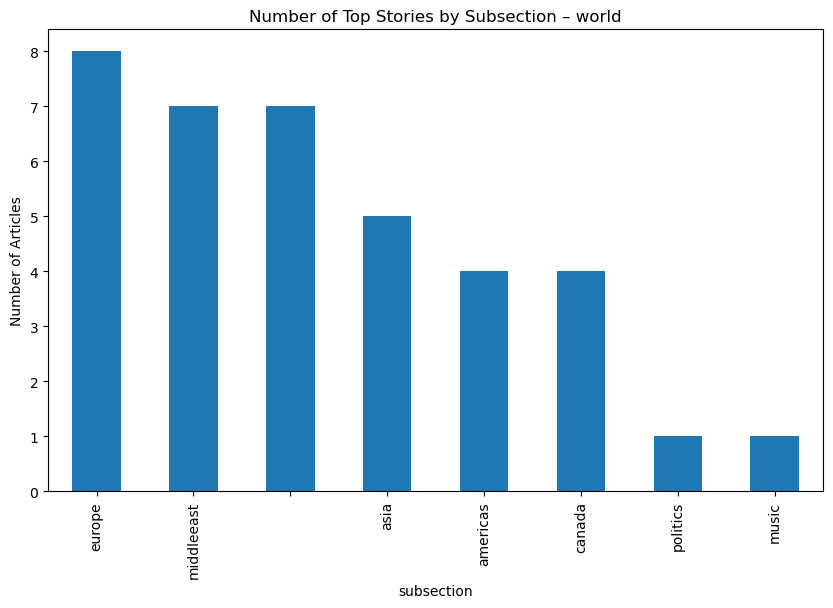

In [12]:
df["subsection"].fillna("(none)").value_counts().plot(
    kind="bar", 
    title=f"Number of Top Stories by Subsection – {section}"
)
plt.ylabel("Number of Articles")
plt.show()


In [13]:
df.to_csv(f"nyt_topstories_{section}.csv", index=False)
print("Saved successfully!")


Saved successfully!


### Introduction
This notebook uses the New York Times Top Stories API to pull current headlines and analyze which subsections have the most articles today.

### Data Request
We used the `requests` library to access the Top Stories endpoint for the "world" section.

### Data Cleaning
The JSON data was normalized into a pandas DataFrame, and only the main descriptive columns were kept.

### Visualization
The chart shows how articles are distributed across different subsections in the "world" category.

### Conclusion
This analysis gives a quick overview of which global topics dominate the NYT World section today.
